<a href="https://colab.research.google.com/github/bluezdot/ShopeeImageClassification/blob/main/ShopeeImageEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [69]:
!git clone https://github.com/bluezdot/ShopeeImageClassification.git

Cloning into 'ShopeeImageClassification'...
remote: Enumerating objects: 32436, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 32436 (delta 0), reused 15 (delta 0), pack-reused 32421
Receiving objects: 100% (32436/32436), 1.67 GiB | 13.79 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (32419/32419), done.


In [70]:
%cd ShopeeImageClassification/dataset/

/content/ShopeeImageClassification/dataset/ShopeeImageClassification/dataset


In [71]:
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import cv2

In [72]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sample_submission_df = pd.read_csv('./sample_submission.csv')

## Check for null - values

In [73]:
print("------TEST--------")
test_df.info()

print('\n')
print("------sAMPLE SUBMISSION--------")
sample_submission_df.info()

print('\n')
print("------TRAIN--------")
train_df.info()

train_df.head(5) # show first 5 records

------TEST--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   3 non-null      object
 1   image        3 non-null      object
 2   image_phash  3 non-null      object
 3   title        3 non-null      object
dtypes: object(4)
memory usage: 224.0+ bytes


------sAMPLE SUBMISSION--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   posting_id  3 non-null      object
 1   matches     3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


------TRAIN--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  objec

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


## Check for duplicated value

-.- Here we check for duplicated images. \
-.- After then, images have the same p-hash => duplication (delete in preprocessing stage)

In [74]:
for col in train_df.columns:
    m = len(train_df) - train_df[col].nunique()
    if m >0:
        print(f"{col} contains duplicated values. Number of duplicate:{m}")

image contains duplicated values. Number of duplicate:1838
image_phash contains duplicated values. Number of duplicate:5515
title contains duplicated values. Number of duplicate:1133
label_group contains duplicated values. Number of duplicate:23236


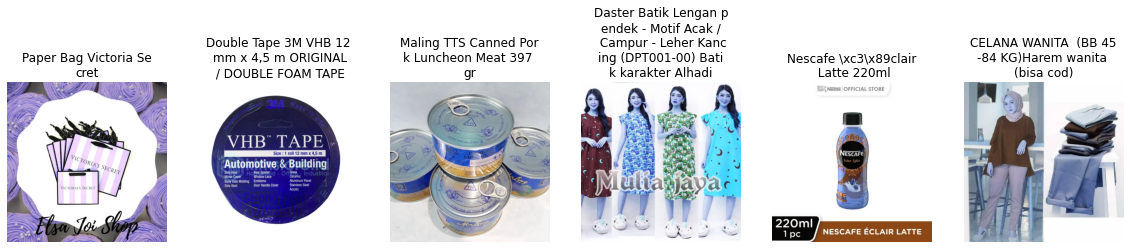

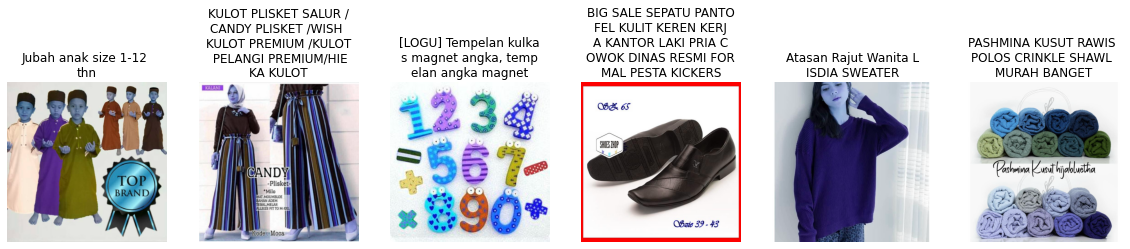

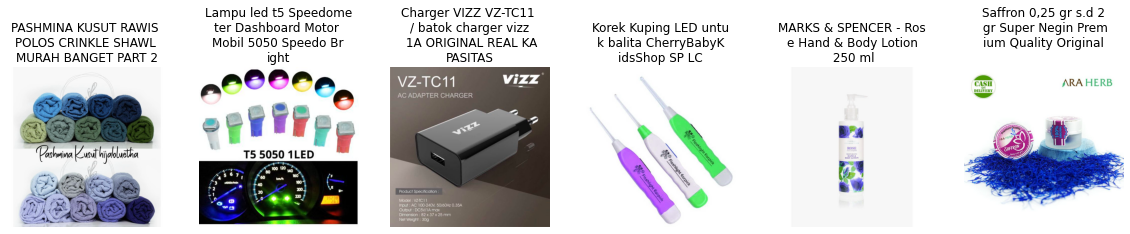

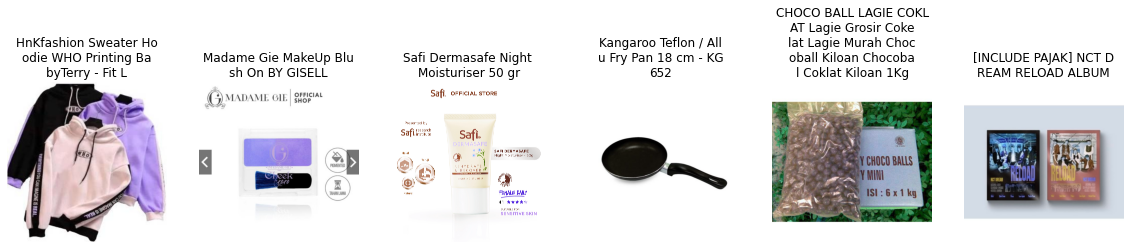

In [75]:
def display_images(df=train_df, random=False, COLS=6, ROWS=4, path='./train_images/'): # grid 4x6 to display images example in df
    for k in range(ROWS):
        plt.figure(figsize=(20,5))  # set size for each image
        for j in range(COLS):
            if random: img = np.random.randint(0,len(df)) # get a random image if random mode
            else: img = COLS*k + j  # get (COLS * ROWS) first images
            name = df.iloc[img,1]
            title = ""
            for i, chr in enumerate(df.iloc[img,3]):
                title += chr
                if (i!=0)&(i%20==0): title += '\n'
            plt.subplot(1,COLS,j+1)
            plt.title(title)
            plt.axis('off')
            plt.imshow(cv2.imread(path+name))
        plt.show()

# display_images(random=True)
display_images(COLS = 6, ROWS = 4)

## Visualize group distribution

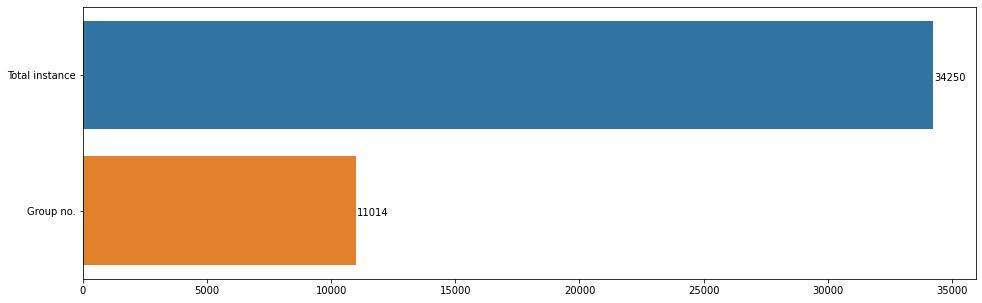

In [76]:
fig = plt.figure(figsize = (16,5))
s = sns.barplot(y = ["Total instance", "Group no."], x = [train_df.shape[0], train_df.label_group.nunique()], orient = 'h')
for p in s.patches:
    plt.text(x = p.get_width() + 30, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(p.get_width())}')

In [77]:
label_df = train_df.groupby('label_group')['posting_id'].describe()
label_df.sort_values('count', ascending=False)

,count,unique,top,freq
label_group,,,,
1163569239,51,51,train_943427380,1
159351600,51,51,train_3055192895,1
994676122,51,51,train_3897008118,1
3113678103,51,51,train_3382714342,1
3627744656,51,51,train_1551941123,1
...,...,...,...,...
2357508171,2,2,train_1211053562,1
2357372960,2,2,train_3205019634,1
2357221297,2,2,train_3118260265,1


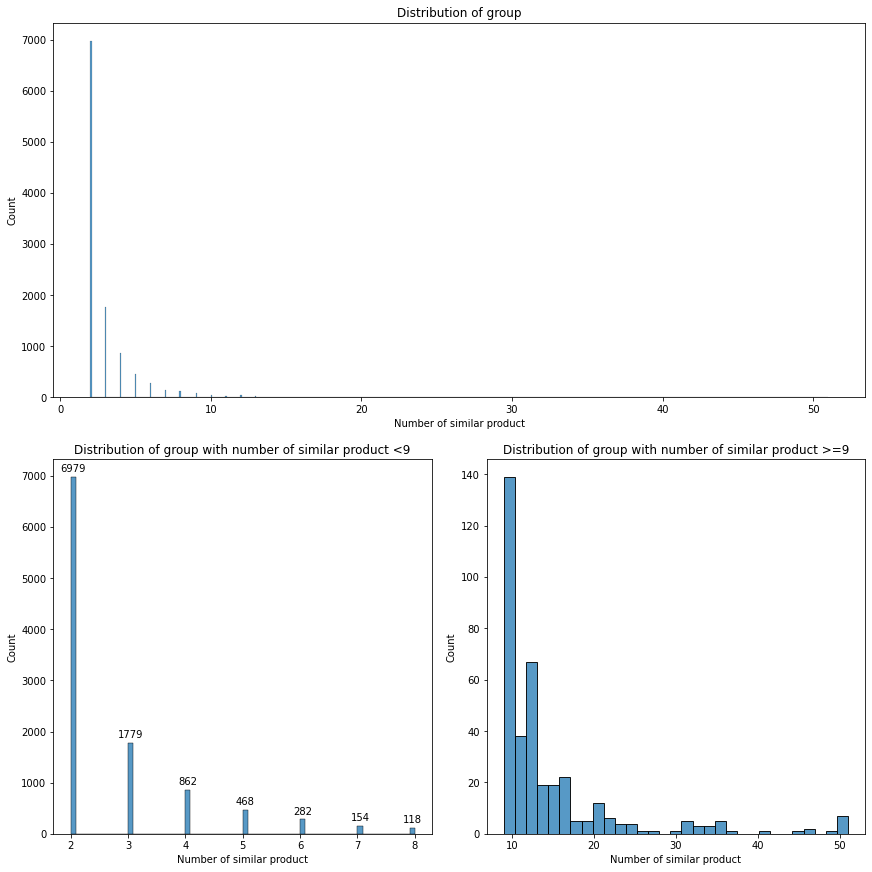

In [78]:
fig = plt.figure(constrained_layout=True,figsize=(12,12))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

sns.histplot(data=label_df,x='count',ax=ax0)
sns.histplot(data=label_df[label_df['count']<9],x='count',ax=ax1)
sns.histplot(data=label_df[label_df['count']>=9],x='count',ax=ax2)
ax0.set_title("Distribution of group")
ax1.set_title("Distribution of group with number of similar product <9")
ax2.set_title("Distribution of group with number of similar product >=9")
ax0.set_xlabel("Number of similar product")
ax1.set_xlabel("Number of similar product")
ax2.set_xlabel("Number of similar product")
for p in ax1.patches:
    if p.get_height() != 0:
        ax1.annotate(int(p.get_height()), 
                    xy = (p.get_x() + p.get_width() /2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), 
                    textcoords = 'offset points')

## Visualize width and height distribution

In [79]:
train_df['img_path'] = "./train_images/" + train_df.image
test_df['img_path'] = "./test_images/" + test_df.image
train_df['img_shape'] = train_df['img_path'].progress_apply(lambda x: np.shape(cv2.imread(x)))
test_df['img_shape'] = test_df['img_path'].progress_apply(lambda x: np.shape(cv2.imread(x)))

  0%|          | 0/34250 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [80]:
train_df['height']=[r[0] for r in train_df.img_shape]
train_df['width']=[r[1] for r in train_df.img_shape]
train_df.head(20)

# test_df['height']=[r[0] for r in test_df.img_shape]
# test_df['width']=[r[1] for r in test_df.img_shape]
# test_df.head(5)

,posting_id,image,image_phash,title,label_group,img_path,img_shape,height,width
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./train_images/0000a68812bc7e98c42888dfb1c07da...,"(1024, 1024, 3)",1024,1024
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./train_images/00039780dfc94d01db8676fe789ecd0...,"(1000, 1000, 3)",1000,1000
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./train_images/000a190fdd715a2a36faed16e2c65df...,"(640, 640, 3)",640,640
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,./train_images/00117e4fc239b1b641ff08340b42963...,"(640, 640, 3)",640,640
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,./train_images/00136d1cf4edede0203f32f05f66058...,"(756, 756, 3)",756,756
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217,./train_images/0013e7355ffc5ff8fb1ccad3e42d92f...,"(640, 640, 3)",640,640
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137,./train_images/00144a49c56599d45354a1c28104c03...,"(640, 640, 3)",640,640
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687,./train_images/0014f61389cbaa687a58e38a97b6383...,"(640, 640, 3)",640,640
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463,./train_images/0019a3c6755a194cb2e2c12bfc63972...,"(300, 300, 3)",300,300
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665,./train_images/001be52b2beec40ddc1d2d7fc7a68f0...,"(700, 700, 3)",700,700


Text(0.5, 1.0, 'Image Shape Log-Scale Distribution')

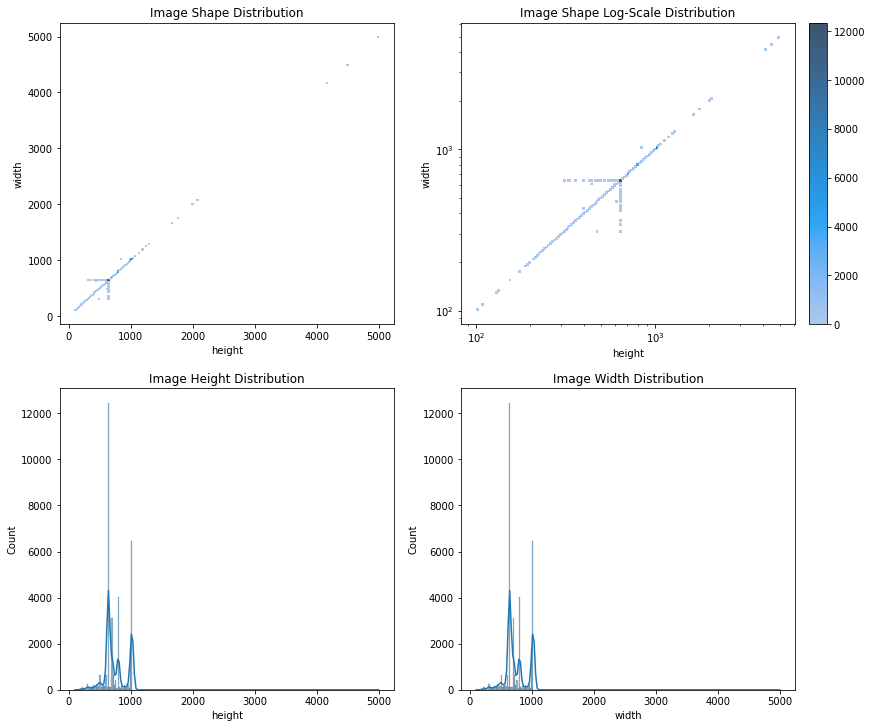

In [81]:
fig = plt.figure(constrained_layout=True,figsize=(12,10))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0,1])

sns.histplot(data=train_df, x='height', kde=True, ax=ax1)
ax1.set_title('Image Height Distribution')
sns.histplot(data=train_df, x='width', kde=True, ax=ax2)
ax2.set_title('Image Width Distribution')
sns.histplot(data=train_df, x='height', y='width',ax=ax0)
ax0.set_title('Image Shape Distribution')
sns.histplot(data=train_df, x='height', y='width',ax=ax3,log_scale=(True,True),cbar=True)
ax3.set_title('Image Shape Log-Scale Distribution')

In [82]:
print('IMAGE WIDTH')
train_df.width.describe()

IMAGE WIDTH


count    34250.000000
mean       753.100175
std        189.337824
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: width, dtype: float64

In [83]:
print('IMAGE HEIGHT')
train_df.height.describe()

IMAGE HEIGHT


count    34250.000000
mean       753.110745
std        189.319626
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: height, dtype: float64

## Visualize some groups of products

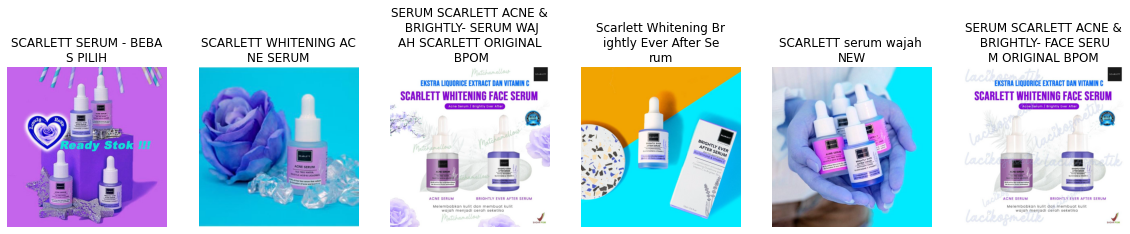

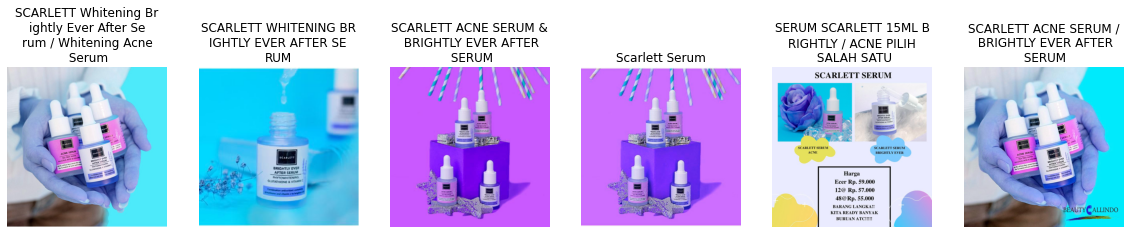

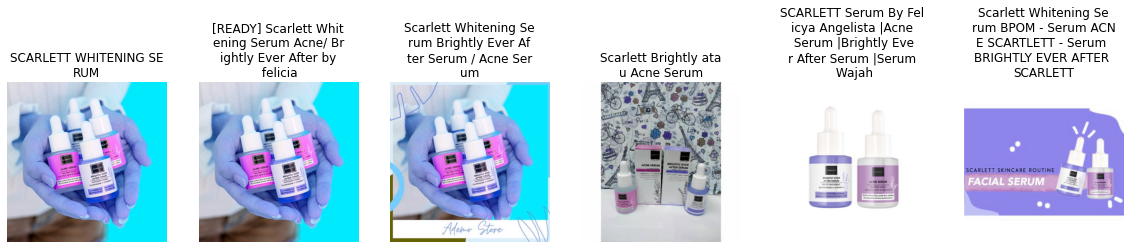

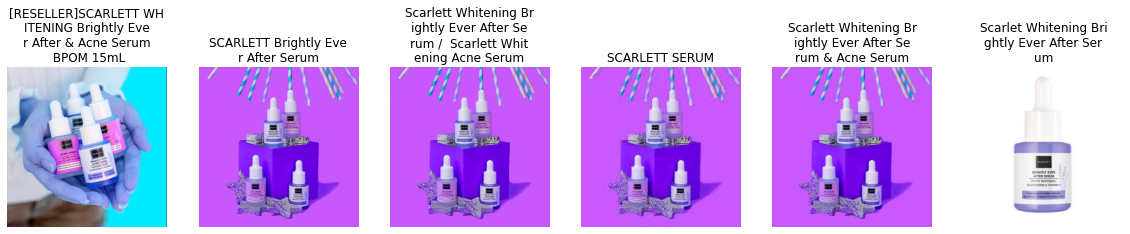

In [84]:
display_images(df=train_df[train_df.label_group==1163569239])

We can see many identical images, so possibly their phash are the same

## Visualize p-hash distribution

In [85]:
phash_df = train_df.groupby('image_phash')['posting_id'].describe()
phash_df.sort_values('count',ascending=False)

,count,unique,top,freq
image_phash,,,,
fad28daa2ad05595,26,26,train_2764460294,1
d0c0ea37bd9acce0,20,20,train_1437764574,1
be12e12f9ec1e198,17,17,train_980903649,1
e992966d4ba49761,16,16,train_1217091186,1
f6d98134b904b56b,16,16,train_1226331500,1
...,...,...,...,...
b996c6cb9b82c266,1,1,train_2246439353,1
b996c6c5ce61c638,1,1,train_2913373542,1
b996c69992c7d330,1,1,train_3575721757,1


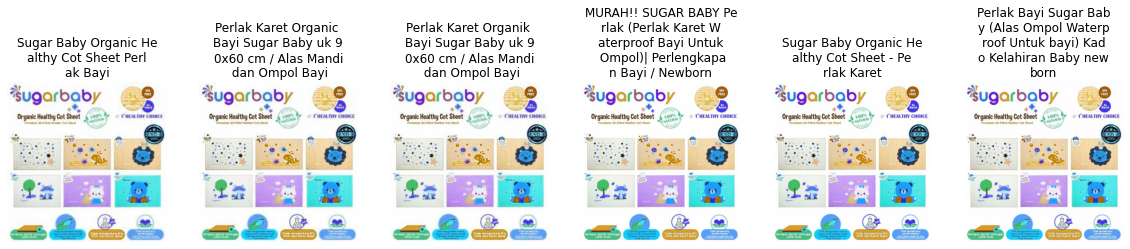

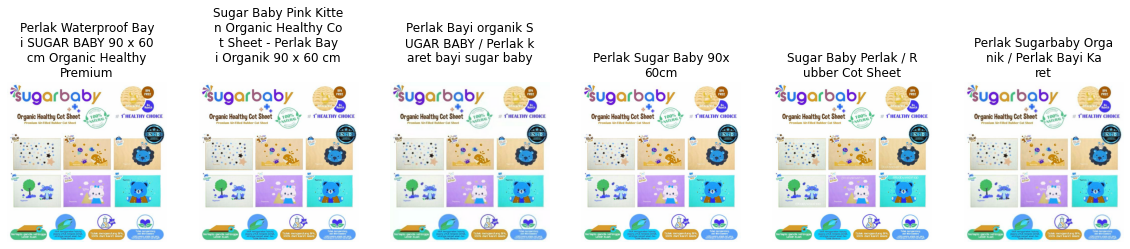

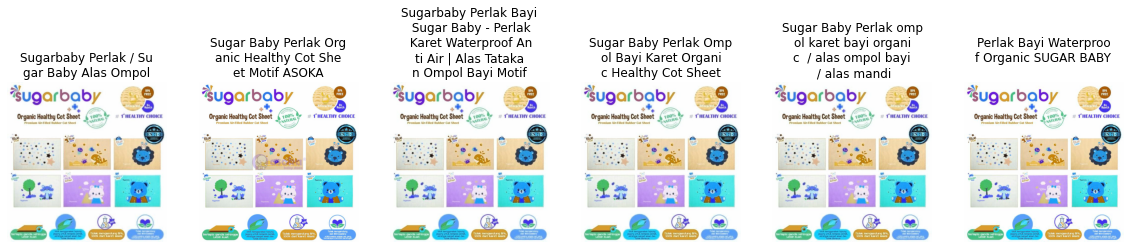

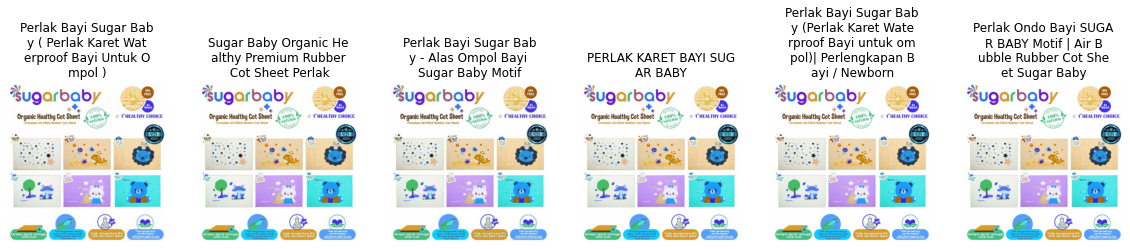

In [86]:
display_images(df=train_df[train_df.image_phash=='fad28daa2ad05595'])

In [87]:
train_df[train_df.image_phash=='fad28daa2ad05595']

,posting_id,image,image_phash,title,label_group,img_path,img_shape,height,width
579,train_1015625393,04a00bccb7f1560e755f5f1def73db59.jpg,fad28daa2ad05595,Sugar Baby Organic Healthy Cot Sheet Perlak Bayi,997220911,./train_images/04a00bccb7f1560e755f5f1def73db5...,"(300, 300, 3)",300,300
1978,train_1942146514,0f459b1e8aa89ee9e79b2ec95440e9c3.jpg,fad28daa2ad05595,Perlak Karet Organic Bayi Sugar Baby uk 90x60 ...,997220911,./train_images/0f459b1e8aa89ee9e79b2ec95440e9c...,"(300, 300, 3)",300,300
1979,train_1720530417,0f459b1e8aa89ee9e79b2ec95440e9c3.jpg,fad28daa2ad05595,Perlak Karet Organik Bayi Sugar Baby uk 90x60 ...,997220911,./train_images/0f459b1e8aa89ee9e79b2ec95440e9c...,"(300, 300, 3)",300,300
3916,train_1062957964,1dbf735adb93d54e6340af02f9b5472e.jpg,fad28daa2ad05595,MURAH!! SUGAR BABY Perlak (Perlak Karet Waterp...,997220911,./train_images/1dbf735adb93d54e6340af02f9b5472...,"(700, 700, 3)",700,700
3917,train_4124267548,1dbf735adb93d54e6340af02f9b5472e.jpg,fad28daa2ad05595,Sugar Baby Organic Healthy Cot Sheet - Perlak ...,997220911,./train_images/1dbf735adb93d54e6340af02f9b5472...,"(700, 700, 3)",700,700
5919,train_4270145275,2cd540e8c1810d1d1aaf3d73b8116cdc.jpg,fad28daa2ad05595,Perlak Bayi Sugar Baby (Alas Ompol Waterproof ...,997220911,./train_images/2cd540e8c1810d1d1aaf3d73b8116cd...,"(700, 700, 3)",700,700
8993,train_989190235,43af52158ed9acd8274a7d6d6c109dfc.jpg,fad28daa2ad05595,Perlak Waterproof Bayi SUGAR BABY 90 x 60 cm O...,997220911,./train_images/43af52158ed9acd8274a7d6d6c109df...,"(700, 700, 3)",700,700
10768,train_3574291998,50ef370271e8c7e00eaaf018c9cd93dd.jpg,fad28daa2ad05595,Sugar Baby Pink Kitten Organic Healthy Cot She...,997220911,./train_images/50ef370271e8c7e00eaaf018c9cd93d...,"(700, 700, 3)",700,700
12248,train_1943986671,5c1e0f695fb5ab7b0d83de0fef4bfdaf.jpg,fad28daa2ad05595,Perlak Bayi organik SUGAR BABY / Perlak karet ...,997220911,./train_images/5c1e0f695fb5ab7b0d83de0fef4bfda...,"(640, 640, 3)",640,640
17760,train_3141138577,8591ed8b5bc268e386a66206bb233b2f.jpg,fad28daa2ad05595,Perlak Sugar Baby 90x60cm,997220911,./train_images/8591ed8b5bc268e386a66206bb233b2...,"(640, 640, 3)",640,640


Text(0.5, 1.0, 'PHASH Distribution with number of images >= 10')

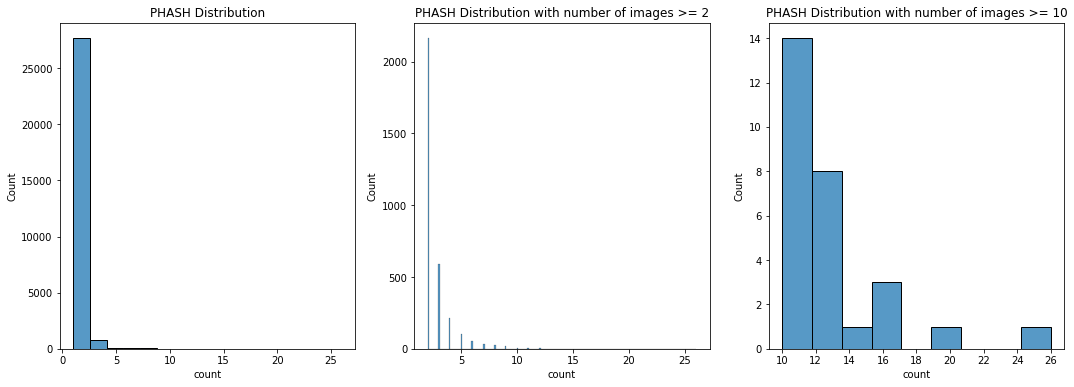

In [88]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
sns.histplot(data=phash_df,x='count',ax=axes[0])
sns.histplot(data=phash_df[phash_df['count'] >= 2], x='count', ax=axes[1])
sns.histplot(data=phash_df[phash_df['count'] >= 10], x='count', ax=axes[2])
axes[0].set_title("PHASH Distribution")
axes[1].set_title("PHASH Distribution with number of images >= 2")
axes[2].set_title("PHASH Distribution with number of images >= 10")